**Descriptive Statistics**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# dataset
data = {
    'Fruit': ['Apple', 'Banana', 'Orange', 'Grapes', 'Mango', 'Apple', 'Banana', 'Mango', 'Apple', 'Orange'],
    'Quantity': [50, 30, 20, 40, 60, 70, 30, 80, 90, 100],
    'Price_per_Unit': [0.5, 0.2, 0.6, 2.5, 1.5, 0.5, 0.2, 1.5, 0.5, 0.6]
}

df = pd.DataFrame(data)
df


,Fruit,Quantity,Price_per_Unit
0,Apple,50,0.5
1,Banana,30,0.2
2,Orange,20,0.6
3,Grapes,40,2.5
4,Mango,60,1.5
5,Apple,70,0.5
6,Banana,30,0.2
7,Mango,80,1.5
8,Apple,90,0.5
9,Orange,100,0.6


Calculate Descriptive Statistics

mean, median, mode, variance, standard deviation, range, interquartile range

In [ ]:
mean_quantity = df['Quantity'].mean()
print(f"Mean Quantity: {mean_quantity}")


Mean Quantity: 57.0


In [ ]:
median_quantity = df['Quantity'].median()
print(f"Median Quantity: {median_quantity}")


Median Quantity: 55.0


In [ ]:
mode_quantity = df['Quantity'].mode()[0]
print(f"Mode Quantity: {mode_quantity}")


Mode Quantity: 30


In [ ]:
summary = df["Age"].describe()
print(summary)


count    50.000000
mean     37.540000
std      11.754652
min      19.000000
25%      28.000000
50%      38.000000
75%      45.000000
max      59.000000
Name: Age, dtype: float64


In [ ]:
variance_quantity = df['Quantity'].var()
print(f"Variance Quantity: {variance_quantity}")


Variance Quantity: 756.6666666666666


In [ ]:
std_deviation_quantity = df['Quantity'].std()
print(f"Standard Deviation Quantity: {std_deviation_quantity}")


Standard Deviation Quantity: 27.507574714370342


In [ ]:
range_quantity = df['Quantity'].max() - df['Quantity'].min()
print(f"Range Quantity: {range_quantity}")


Range Quantity: 80


In [ ]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range: {IQR}")


Interquartile Range: 45.0


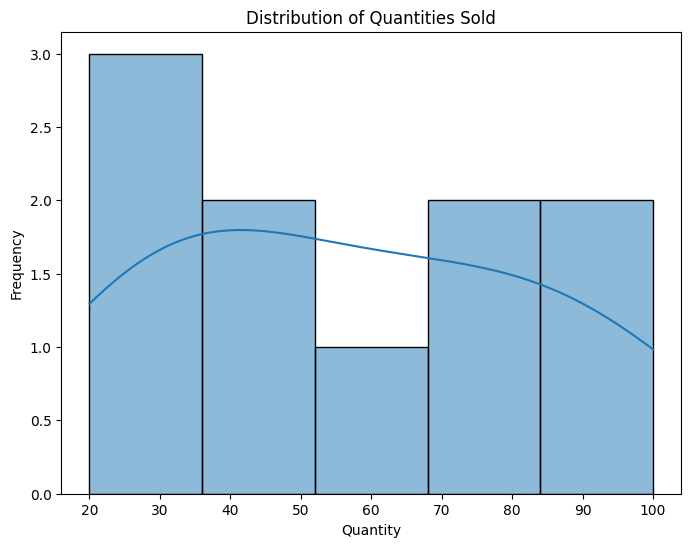

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Quantity'], kde=True)
plt.title('Distribution of Quantities Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


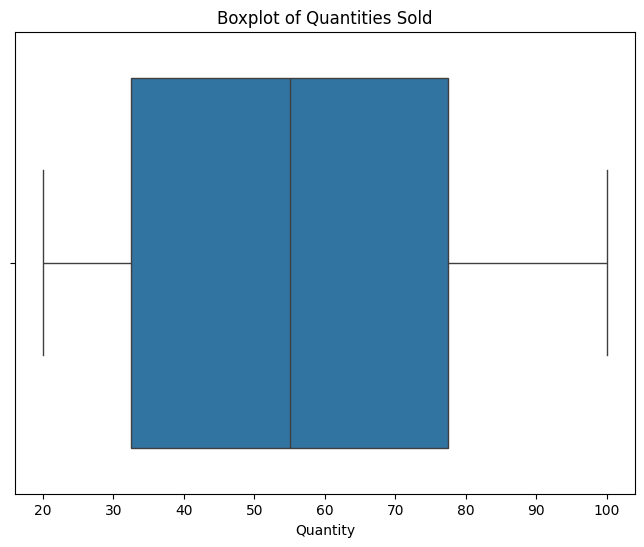

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantities Sold')
plt.xlabel('Quantity')
plt.show()


**Inferential Statistics**

In [48]:
import scipy.stats as stats

In [49]:
# Creating a dataset
data = {
    'Postman': ['kumar', 'ram', 'bharath', 'Tom', 'john', 'mahi', 'David', 'santhosh', 'James', 'Lily'],
    'Deliveries': [120, 150, 130, 160, 180, 170, 110, 140, 160, 155]
}

df = pd.DataFrame(data)
df


,Postman,Deliveries
0,kumar,120
1,ram,150
2,bharath,130
3,Tom,160
4,john,180
5,mahi,170
6,David,110
7,santhosh,140
8,James,160
9,Lily,155


Inferential Statistics Calculations

*  Confidence Interval for the Mean Deliveries
to calculate the 95% confidence interval for the mean number of deliveries, assuming the population standard deviation is unknown (use sample standard deviation)

In [50]:
# Sample Mean and Standard Deviation
mean_deliveries = df['Deliveries'].mean()
std_dev_deliveries = df['Deliveries'].std()

# Sample Size
n = len(df)

# Z-value for 95% confidence (for normal distribution)
z_value = stats.norm.ppf(0.975)

# Confidence Interval
margin_of_error = z_value * (std_dev_deliveries / np.sqrt(n))
ci_lower = mean_deliveries - margin_of_error
ci_upper = mean_deliveries + margin_of_error

print(f"95% Confidence Interval for the Mean Deliveries: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval for the Mean Deliveries: (133.70, 161.30)


In [51]:
'''t-test'''

# test if the mean no. of  deliveries is different from 150
t_stat, p_value = stats.ttest_1samp(df['Deliveries'], 150)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -0.35503580124836315
P-value: 0.7307406576060502


In [52]:
# Decision based on significance level (alpha = 0.05)
if p_value > 0.05:
    print("Reject the null hypothesis: The mean number of deliveries is different from 150.")
else:
    print("Fail to reject the null hypothesis: The mean number of deliveries is not significantly different from 150.")

Reject the null hypothesis: The mean number of deliveries is different from 150.


 Regression Analysis

* to predict the number of deliveries based on some feature (e.g., postman experience), we could add more features to the dataset and perform a regression analysis. For simplicity, let's assume we're predicting deliveries based on an imaginary "Experience" variable.

In [53]:
# Adding Experience column for regression (simulating values)
df['Experience'] = [2, 3, 1, 4, 5, 3, 2, 4, 6, 3]


In [54]:
# Performing a simple linear regression
import statsmodels.api as sm

X = df['Experience']
y = df['Deliveries']

# Adding constant (intercept) to the model
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

model.summary()            #regression summary

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Deliveries   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     7.385
Date:                Wed, 20 Nov 2024   Prob (F-statistic):             0.0263
Time:                        11:39:20   Log-Likelihood:                -41.424
No. Observations:                  10   AIC:                             86.85
Df Residuals:                       8   BIC:                             87.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.4328     13.644      8.314      0.000      81.970     144.895
Experience    10.3234      3.799      2.718      0.026       1.564      19.083
==============================================================================
Omnibus:                        0.852   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.653   Jarque-Bera (JB):                0.596
Skew:                          -0.048   Prob(JB):                        0.742
Kurtosis:                       1.808   Cond. No.                         9.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

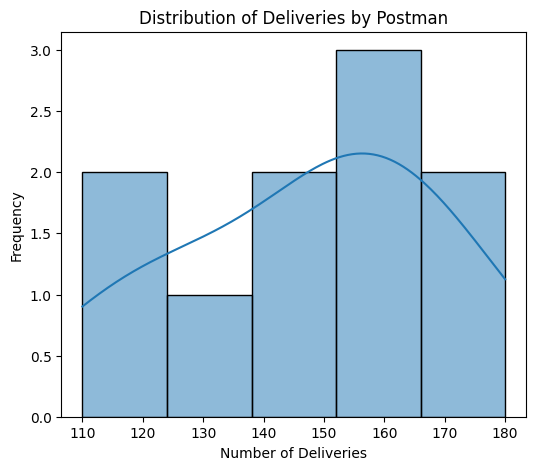

In [61]:
plt.figure(figsize=(6, 5))
sns.histplot(df['Deliveries'], kde=True)
plt.title('Distribution of Deliveries by Postman')
plt.xlabel('Number of Deliveries')
plt.ylabel('Frequency')
plt.show()


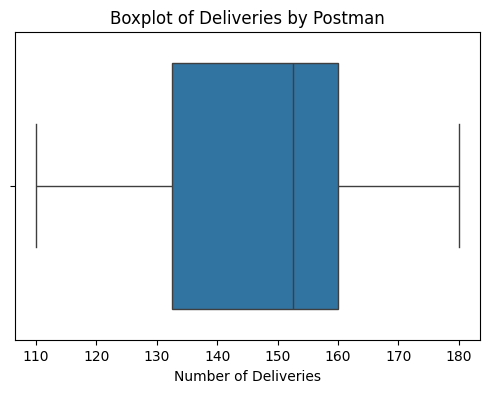

In [60]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Deliveries'])
plt.title('Boxplot of Deliveries by Postman')
plt.xlabel('Number of Deliveries')
plt.show()


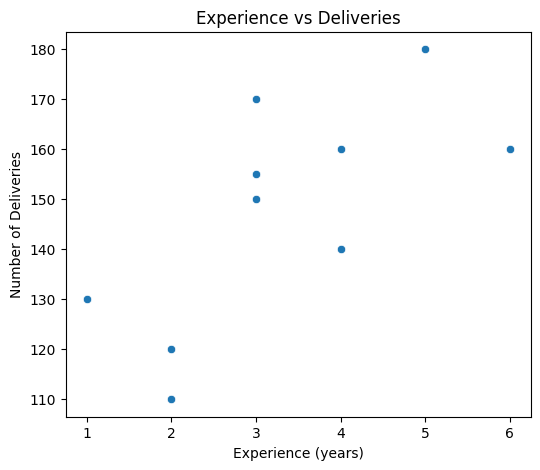

In [59]:
#Scatter Plot for Regression (Experience vs Deliveries)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=df['Experience'], y=df['Deliveries'])
plt.title('Experience vs Deliveries')
plt.xlabel('Experience (years)')
plt.ylabel('Number of Deliveries')
plt.show()


**Frequency distribution**

In [83]:
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns

Data_list = {
    'Student_name': ['Ram', 'Kumar', 'bharath', 'divya', 'bhavya',
                'santhosh', 'Srihan', 'Mounika', 'Swetha', 'varun'],
    'Test_Score': [85, 90, 78, 88, 95, 72, 80, 84, 76, 92]
}

In [84]:
df = pd.DataFrame(Data_list)
df

,Student_name,Test_Score
0,Ram,85
1,Kumar,90
2,bharath,78
3,divya,88
4,bhavya,95
5,santhosh,72
6,Srihan,80
7,Mounika,84
8,Swetha,76
9,varun,92


Create Frequency Distribution

analyze the frequency distribution of the test scores.

*  Frequency of Test Scores:
We’ll calculate how many times each test score appears in the dataset.

In [85]:
# Frequency distribution of Test Scores
score_frequency = df['Test_Score'].value_counts().sort_index()
print("Frequency Distribution of Test Scores:")
print(score_frequency)


Frequency Distribution of Test Scores:
Test_Score
72    1
76    1
78    1
80    1
84    1
85    1
88    1
90    1
92    1
95    1
Name: count, dtype: int64


Relative frequency

In [86]:
# Relative Frequency of Test Scores
relative_frequency = df['Test_Score'].value_counts(normalize=True).sort_index()
print("\nRelative Frequency of Test Scores:")
print(relative_frequency)



Relative Frequency of Test Scores:
Test_Score
72    0.1
76    0.1
78    0.1
80    0.1
84    0.1
85    0.1
88    0.1
90    0.1
92    0.1
95    0.1
Name: proportion, dtype: float64


Cumulative frequency

In [87]:
# Cumulative Frequency of Test Scores
cumulative_frequency = score_frequency.cumsum()
print("\nCumulative Frequency of Test Scores:")
print(cumulative_frequency)



Cumulative Frequency of Test Scores:
Test_Score
72     1
76     2
78     3
80     4
84     5
85     6
88     7
90     8
92     9
95    10
Name: count, dtype: int64


In [88]:
# Grouped Frequency Distribution (Bin test scores)
bins = [70, 80, 85, 90, 95]
labels = ['70-80', '80-85', '85-90', '90-95']
df['Score_Bin'] = pd.cut(df['Test_Score'], bins=bins, labels=labels, right=False)

# Frequency distribution of test scores in bins
grouped_frequency = df['Score_Bin'].value_counts().sort_index()
print("\nGrouped Frequency Distribution (Test Score Bins):")
print(grouped_frequency)



Grouped Frequency Distribution (Test Score Bins):
Score_Bin
70-80    3
80-85    2
85-90    2
90-95    2
Name: count, dtype: int64


<ipython-input-91-465b3094ca76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_frequency.index, y=score_frequency.values, palette='viridis')


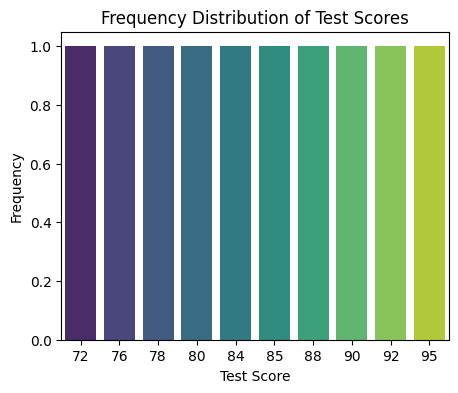

In [91]:
# frequency distribution of test scores
plt.figure(figsize=(5, 4))
sns.barplot(x=score_frequency.index, y=score_frequency.values, palette='viridis')
plt.title('Frequency Distribution of Test Scores')
plt.xlabel('Test Score')
plt.ylabel('Frequency')
plt.show()


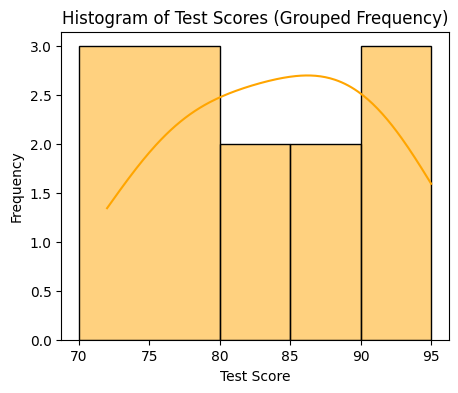

In [93]:
# Histogram for grouped frequency distribution (test score bins)
plt.figure(figsize=(5, 4))
sns.histplot(df['Test_Score'], bins=bins, kde=True, color='orange')
plt.title('Histogram of Test Scores (Grouped Frequency)')
plt.xlabel('Test Score')
plt.ylabel('Frequency')
plt.show()
